# Pymaceuticals Inc.
---

### Analysis

- These dataframes and charts go over mice with tumors and their drug treatment over time. We can see in the combined_data(the main dataframe) that there are varying identified mice that all have different ages, weights, and treatments that they undergo. Later on in the notebook, you can get the data of a particular mouse, a group of mice, or other variables from the combined_data data frame. Some of the graphs also show the effectiveness of each drug regimen through comparision with all the other drug regimens, in particular focus, Capomulin.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_count = combined_data['Mouse ID'].nunique()
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_data.loc[combined_data['Mouse ID'] == 'g989', :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
cleaned_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = cleaned_mice['Mouse ID'].nunique()
clean_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean = cleaned_mice.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
regimen_median = cleaned_mice.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
regimen_variance = cleaned_mice.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
regimen_std = cleaned_mice.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
regimen_SEM = cleaned_mice.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

regimen_df = pd.DataFrame({'Mean Tumor Volume': regimen_mean,
                              'Median Tumor Volume': regimen_median,
                              'Tumor Volume Variance': regimen_variance,
                              'Tumor Volume Standard Deviation': regimen_std,
                              'Tumor Volume Standard Error': regimen_SEM,
                            })
regimen_df


C:\Users\Jesse\AppData\Local\Temp\ipykernel_10696\1312458660.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regimen_mean = cleaned_mice.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
C:\Users\Jesse\AppData\Local\Temp\ipykernel_10696\1312458660.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regimen_median = cleaned_mice.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
C:\Users\Jesse\AppData\Local\Temp\ipykernel_10696\1312458660.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either s

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_agg = cleaned_mice.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

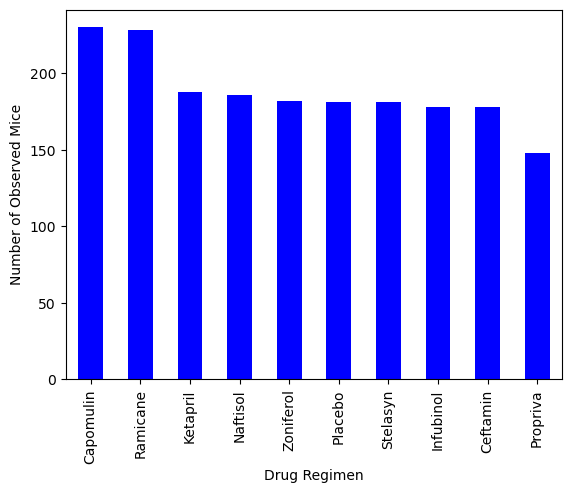

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_mice_count = cleaned_mice['Drug Regimen'].value_counts()

regimen_mice_count.plot.bar(color='b')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mice')

plt.show()

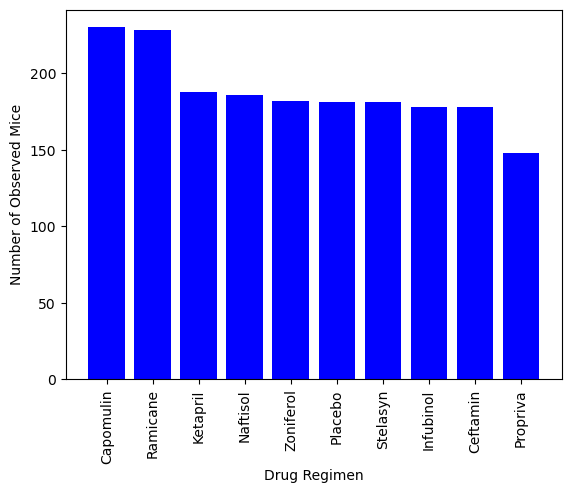

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = regimen_mice_count.index.values
y_axis = regimen_mice_count.values

plt.bar(x_axis, y_axis, color='b', align='center')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mice')
plt.xticks(rotation='vertical')

plt.show()

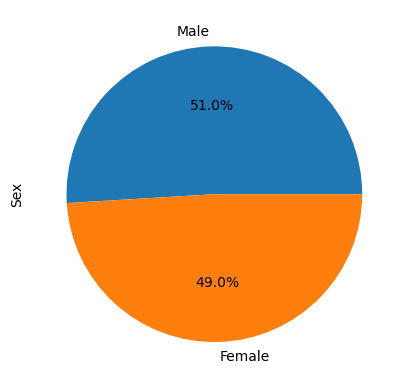

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender_pie = cleaned_mice['Sex'].value_counts()
mouse_gender_pie.plot.pie(autopct="%1.1f%%")

plt.ylabel('Sex')

plt.show()

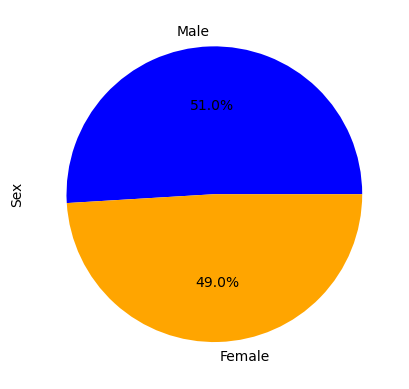

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Gets the total count and percent of both Male and Female mice as variables
male_count = len(cleaned_mice[cleaned_mice['Sex'] == 'Male'])
female_count = len(cleaned_mice[cleaned_mice['Sex'] == 'Female'])
male_percent = male_count / len(cleaned_mice['Mouse ID'])
female_percent = female_count / len(cleaned_mice['Mouse ID'])


labels = ['Male', 'Female']
sizes = [male_percent, female_percent]
colors = ['b', 'Orange']

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%",)

plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = pd.DataFrame(cleaned_mice.groupby('Mouse ID')['Timepoint'].max()).rename(columns={'Timepoint':'Greatest Timepoint'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_mice = pd.merge(cleaned_mice, greatest_timepoint, how='right', on='Mouse ID')
last_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
0,a203,Infubinol,Female,20,23,0,45.000000,0,45
1,a203,Infubinol,Female,20,23,5,48.508468,0,45
2,a203,Infubinol,Female,20,23,10,51.852437,1,45
3,a203,Infubinol,Female,20,23,15,52.777870,1,45
4,a203,Infubinol,Female,20,23,20,55.173336,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

treatment_data = []

for regimen in treatments:

    treatment_df = last_mice.loc[last_mice['Drug Regimen'] == regimen]

    final_volume_df = treatment_df.loc[treatment_df['Timepoint'] == treatment_df['Greatest Timepoint']]
    
    values = final_volume_df['Tumor Volume (mm3)']
    treatment_data.append(values)

    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {regimen}: {iqr}')

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {regimen}: {lower_bound}')
    print(f'Upper Bound for {regimen}: {upper_bound}')

    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {regimen} outliers: {outliers_count}')


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


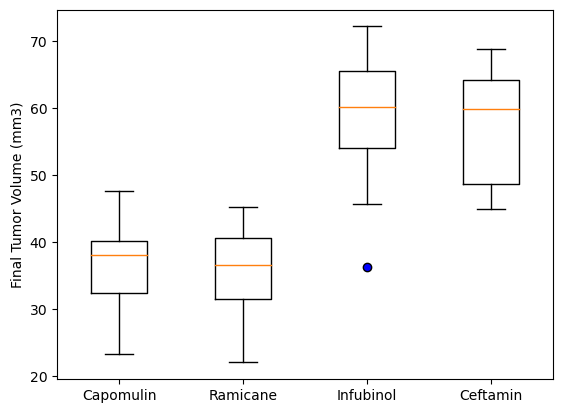

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Makes our outlier more noticiable
flierprops = dict(marker='o', markerfacecolor='b')

plt.boxplot(treatment_data, flierprops=flierprops)

plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

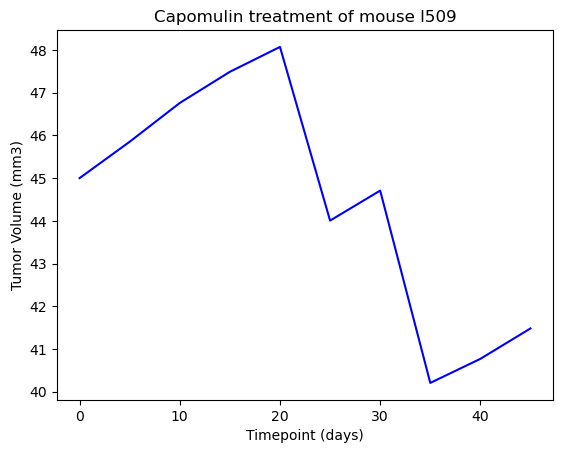

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

l509 = combined_data.loc[combined_data['Mouse ID'] == 'l509']

plt.plot(l509['Timepoint'], l509['Tumor Volume (mm3)'], color='b')

plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

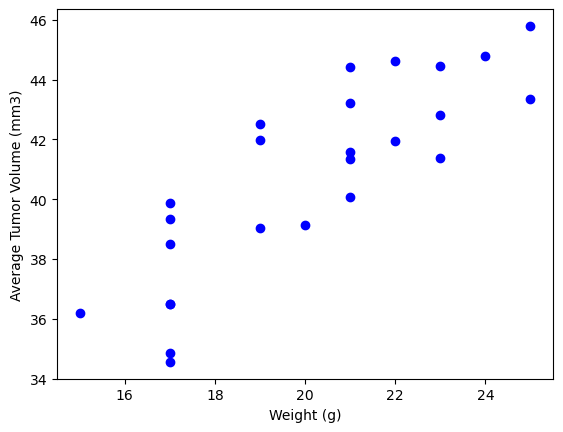

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

avg_capomulin_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

avg_capomulin_df = pd.merge(capomulin_df, avg_capomulin_df, on='Mouse ID')
avg_tumor_volume = avg_capomulin_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
avg_tumor_volume

x = 'Weight (g)'
y = 'avg_tumor_vol'

plt.scatter(avg_tumor_volume[x], avg_tumor_volume[y], color='b')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.83


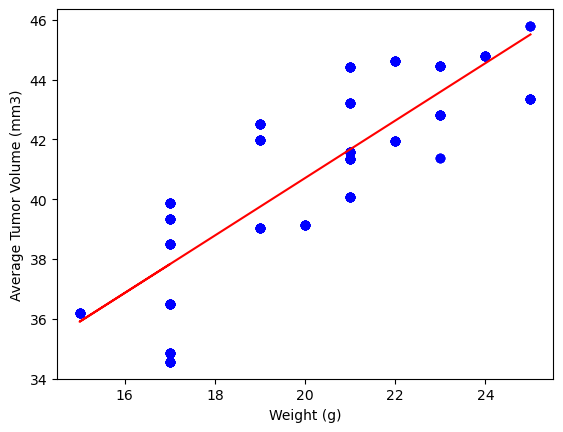

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Code from above, feel free to comment out if you want
capomulin_df = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

avg_capomulin_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

avg_capomulin_df = pd.merge(capomulin_df, avg_capomulin_df, on='Mouse ID')
avg_tumor_volume = avg_capomulin_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
avg_tumor_volume

x = avg_capomulin_df['Weight (g)']
y = avg_capomulin_df['avg_tumor_vol']

correlation = st.pearsonr(x,y)

plt.scatter(x, y, color='b')

print(f'The correlation between mouse weight and the average tumor volume is: {round(correlation[0], 2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept

plt.plot(x, regress_values, color='r')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()